In [1]:
pip install librosa

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = r'C:\Users\mrvin\Downloads\ai\module3\project\Audio classification\disco.wav'

In [4]:
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras

C:\Users\mrvin\AppData\Local\Temp\ipykernel_10424\275080069.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(data,sr)


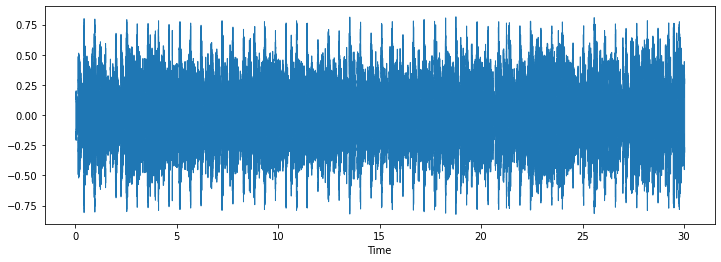

In [5]:
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
sr = sample_rate
librosa.display.waveshow(data,sr)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
data  #librosa normalises the signal compared to wavfile

array([0.09420776, 0.09906006, 0.0581665 , ..., 0.05667114, 0.04855347,
       0.10333252], dtype=float32)

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)

In [9]:
wave_sample_rate

22050

In [10]:
wave_audio

array([3087, 3246, 1906, ..., 1857, 1591, 3386], dtype=int16)

In [11]:
import pandas as pd
Data = pd.read_csv('features_3.csv.csv')
Data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [12]:
Data.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [13]:
Data.shape

(9990, 60)

In [14]:
Data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [15]:
df = Data.drop('filename',axis = 1)
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


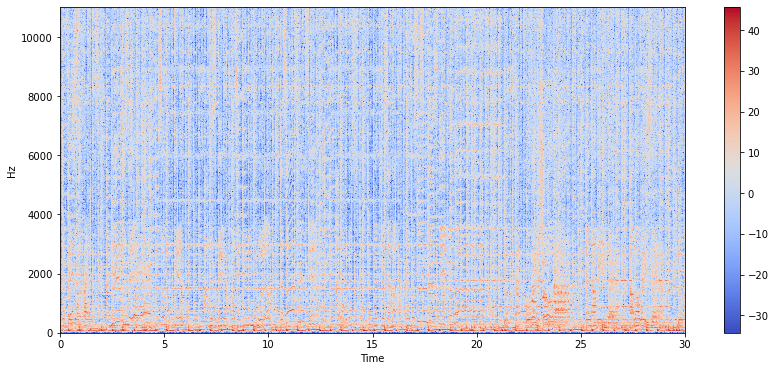

In [16]:
#spectrogram
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr= sr,x_axis = 'time',y_axis = 'hz')
plt.colorbar()

C:\Users\mrvin\AppData\Local\Temp\ipykernel_10424\3248863099.py:3: FutureWarning: Pass y=[0.19420776 0.19906005 0.1581665  ... 0.15667114 0.14855346 0.20333251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data + 0.1,sr=sr)[0]


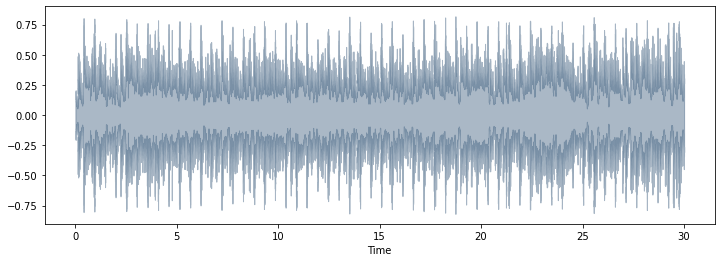

In [17]:
#spectral rolloff
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data + 0.1,sr=sr)[0]
plt.figure(figsize = (12,4))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color = '#2B4F72')

C:\Users\mrvin\AppData\Local\Temp\ipykernel_10424\3439901678.py:2: FutureWarning: Pass y=[0.09420776 0.09906006 0.0581665  ... 0.05667114 0.04855347 0.10333252] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data,sr=sr)


Text(0.5, 1.0, 'chroma feature')

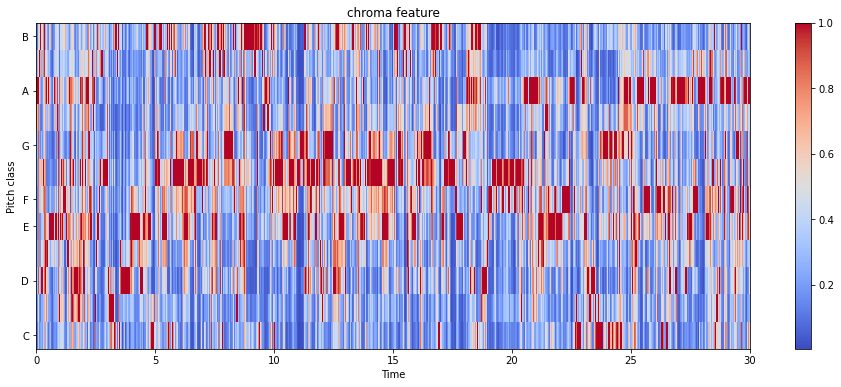

In [18]:
#chroma feature
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(16,6))
librosa.display.specshow(chroma,sr=sr,x_axis = 'time',y_axis = 'chroma',cmap = 'coolwarm')
plt.colorbar()
plt.title('chroma feature')


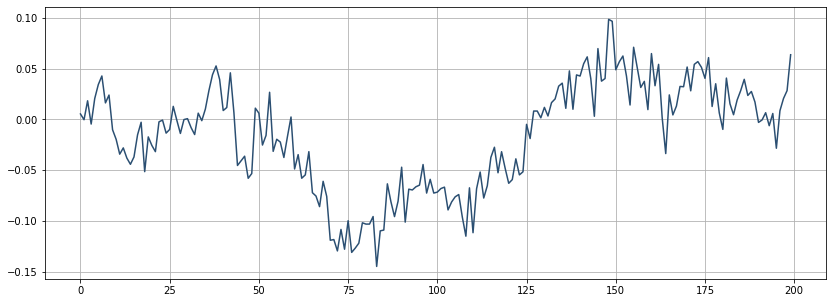

In [19]:
#zero crossing rate
start = 1000
end = 1200
plt.figure(figsize = (14,5))
plt.plot(data[start:end],color = '#2B4F72')
plt.grid()

In [20]:
zero_cross_rate = librosa.zero_crossings(data[start:end],pad = False)
print('The number of zero crossings  =',sum(zero_cross_rate))

The number of zero crossings  = 30


### Feature Extraction

In [21]:
class_list = df.iloc[:,-1]
convertor = LabelEncoder()

In [22]:
y = convertor.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [23]:
print(df.iloc[:,-1])

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985     rock
9986     rock
9987     rock
9988     rock
9989     rock
Name: label, Length: 9990, dtype: object


### Scaling the features

In [24]:
fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:,:-1],dtype = float))

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
len(y_train)

6993

In [27]:
len(y_test)

2997

In [28]:
#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(X_train,y_train)

In [29]:
#y_pred = model.predict(X_test)
#accuracy_score(y_test,y_pred)

In [30]:
from keras import Sequential
import keras as k

In [31]:
def trainmodel(model,epochs,optimizer):
    batch_size = 128
    #callback = myCallback()
    model.compile(optimizer = optimizer,loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')
    return model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs= epochs,batch_size = batch_size)


In [32]:
def plotValidate(history):
    print('Validation accuracy',max(history.history['val_accuracy']))
    pd.DataFrame(history.history).plot(figsize = (12,6))
    plt.show()

In [33]:
model = k.models.Sequential([
    k.layers.Dense(512,activation='relu',input_shape = (X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10,activation='softmax'),
])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [34]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [37]:
model_history = trainmodel(model = model,epochs = 600,optimizer='adam')

Epoch 1/600
55/55 [==============================] - 1s 6ms/step - loss: 0.0065 - accuracy: 0.9974 - val_loss: 0.6048 - val_accuracy: 0.9316
Epoch 2/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.6717 - val_accuracy: 0.9313
Epoch 3/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.6466 - val_accuracy: 0.9313
Epoch 4/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.9960 - val_loss: 0.6450 - val_accuracy: 0.9299
Epoch 5/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0159 - accuracy: 0.9956 - val_loss: 0.6620 - val_accuracy: 0.9279
Epoch 6/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.6556 - val_accuracy: 0.9296
Epoch 7/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.5944 - val_accuracy: 0.9336
Epoch 8/600
5

Epoch 59/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.4741 - val_accuracy: 0.9346
Epoch 60/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.4693 - val_accuracy: 0.9353
Epoch 61/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.9961 - val_loss: 0.5216 - val_accuracy: 0.9333
Epoch 62/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.4652 - val_accuracy: 0.9333
Epoch 63/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 0.9956 - val_loss: 0.4759 - val_accuracy: 0.9326
Epoch 64/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.4860 - val_accuracy: 0.9383
Epoch 65/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.4810 - val_accuracy: 0.9379
Epoch 

55/55 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.4978 - val_accuracy: 0.9343
Epoch 117/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9964 - val_loss: 0.5033 - val_accuracy: 0.9373
Epoch 118/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.5197 - val_accuracy: 0.9353
Epoch 119/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.5481 - val_accuracy: 0.9349
Epoch 120/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 0.5151 - val_accuracy: 0.9379
Epoch 121/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9964 - val_loss: 0.5190 - val_accuracy: 0.9353
Epoch 122/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.4994 - val_accuracy: 0.9393
Epoch 123/600

55/55 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.4637 - val_accuracy: 0.9339
Epoch 174/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.4725 - val_accuracy: 0.9303
Epoch 175/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.4621 - val_accuracy: 0.9336
Epoch 176/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.4841 - val_accuracy: 0.9346
Epoch 177/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.5210 - val_accuracy: 0.9349
Epoch 178/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.5149 - val_accuracy: 0.9319
Epoch 179/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.5345 - val_accuracy: 0.9283
Epoch 180/600

55/55 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9961 - val_loss: 0.5204 - val_accuracy: 0.9363
Epoch 231/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.5234 - val_accuracy: 0.9353
Epoch 232/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 0.5474 - val_accuracy: 0.9303
Epoch 233/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.5405 - val_accuracy: 0.9343
Epoch 234/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9973 - val_loss: 0.5589 - val_accuracy: 0.9323
Epoch 235/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9976 - val_loss: 0.5672 - val_accuracy: 0.9336
Epoch 236/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 0.5734 - val_accuracy: 0.9316
Epoch 237/600

55/55 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9977 - val_loss: 0.5376 - val_accuracy: 0.9343
Epoch 288/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 0.9964 - val_loss: 0.5234 - val_accuracy: 0.9346
Epoch 289/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 0.9967 - val_loss: 0.5257 - val_accuracy: 0.9349
Epoch 290/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 0.5517 - val_accuracy: 0.9366
Epoch 291/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.5280 - val_accuracy: 0.9339
Epoch 292/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9966 - val_loss: 0.5945 - val_accuracy: 0.9316
Epoch 293/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9961 - val_loss: 0.5367 - val_accuracy: 0.9296
Epoch 294/600

55/55 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.6632 - val_accuracy: 0.9329
Epoch 345/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.6151 - val_accuracy: 0.9323
Epoch 346/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.6299 - val_accuracy: 0.9316
Epoch 347/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9963 - val_loss: 0.5714 - val_accuracy: 0.9343
Epoch 348/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.5975 - val_accuracy: 0.9356
Epoch 349/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.6144 - val_accuracy: 0.9336
Epoch 350/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.9959 - val_loss: 0.5568 - val_accuracy: 0.9369
Epoch 351/600

55/55 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.5507 - val_accuracy: 0.9343
Epoch 402/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.5667 - val_accuracy: 0.9369
Epoch 403/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9973 - val_loss: 0.5740 - val_accuracy: 0.9306
Epoch 404/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9959 - val_loss: 0.5996 - val_accuracy: 0.9326
Epoch 405/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.5813 - val_accuracy: 0.9326
Epoch 406/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.5791 - val_accuracy: 0.9349
Epoch 407/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9967 - val_loss: 0.5656 - val_accuracy: 0.9346
Epoch 408/600

55/55 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.4642 - val_accuracy: 0.9349
Epoch 459/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.4460 - val_accuracy: 0.9339
Epoch 460/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9970 - val_loss: 0.4909 - val_accuracy: 0.9329
Epoch 461/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0122 - accuracy: 0.9966 - val_loss: 0.4655 - val_accuracy: 0.9333
Epoch 462/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9961 - val_loss: 0.4580 - val_accuracy: 0.9389
Epoch 463/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.4605 - val_accuracy: 0.9379
Epoch 464/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.4721 - val_accuracy: 0.9373
Epoch 465/600

55/55 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.4933 - val_accuracy: 0.9369
Epoch 516/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.5071 - val_accuracy: 0.9376
Epoch 517/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.5007 - val_accuracy: 0.9389
Epoch 518/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.5024 - val_accuracy: 0.9409
Epoch 519/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9971 - val_loss: 0.5097 - val_accuracy: 0.9396
Epoch 520/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9971 - val_loss: 0.5028 - val_accuracy: 0.9399
Epoch 521/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.4896 - val_accuracy: 0.9409
Epoch 522/600

55/55 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 0.9974 - val_loss: 0.5196 - val_accuracy: 0.9403
Epoch 573/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 0.5179 - val_accuracy: 0.9369
Epoch 574/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.5509 - val_accuracy: 0.9373
Epoch 575/600
55/55 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.5541 - val_accuracy: 0.9393
Epoch 576/600
55/55 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 0.9961 - val_loss: 0.5775 - val_accuracy: 0.9343
Epoch 577/600
55/55 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.5493 - val_accuracy: 0.9356
Epoch 578/600
55/55 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.5468 - val_accuracy: 0.9366
Epoch 579/600

In [44]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.5107 - val_accuracy: 0.9369
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0185 - accuracy: 0.9947 - val_loss: 0.5054 - val_accuracy: 0.9346
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9931 - val_loss: 0.4940 - val_accuracy: 0.9329
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9913 - val_loss: 0.5229 - val_accuracy: 0.9296
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.9936 - val_loss: 0.4753 - val_accuracy: 0.9349
Epoch 6/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.4410 - val_accuracy: 0.9323
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.9927 - val_loss: 0.4928 - val_accuracy: 0.9353
Epoch 

In [48]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.013907,0.995567,0.510723,0.936937
1,0.018535,0.994709,0.505353,0.934601
2,0.017438,0.993136,0.494016,0.932933
3,0.034579,0.991277,0.522918,0.929596
4,0.023730,0.993565,0.475255,0.934935
5,0.016597,0.994709,0.440959,0.932266
6,0.028376,0.992707,0.492828,0.935269
7,0.027894,0.992850,0.453029,0.935936
8,0.015304,0.995996,0.521943,0.932599
9,0.025255,0.992564,0.522294,0.933600


<AxesSubplot:>

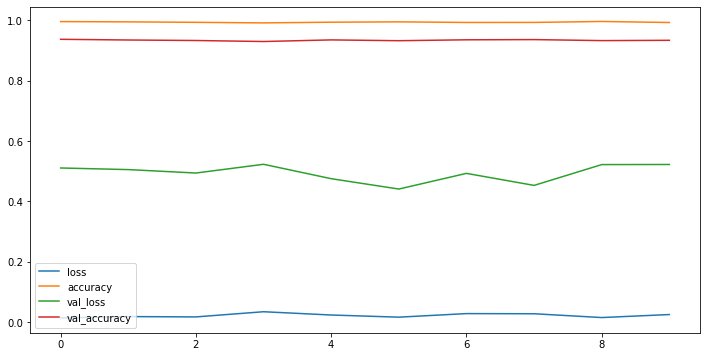

In [49]:
pd.DataFrame(history.history).plot(figsize = (12,6))

In [36]:
test_loss,test_acc = model.evaluate(X_test,y_test,batch_size=128)
print('the test loss is :',test_loss)
print('the test accuracy is :',test_acc * 100)

24/24 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.9353
the test loss is : 0.44921132922172546
the test accuracy is : 93.52685809135437
